In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [50]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [52]:
data = pd.read_csv('Best features.csv')
data.head()

,target,perimeter_mean,area_worst,concave points_mean,concavity_mean,radius_mean,concave points_worst,area_se,area_mean,concavity_worst,perimeter_worst
0,1,122.80,2019.0,0.14710,0.3001,17.99,0.2654,153.40,1001.0,0.7119,184.60
1,1,132.90,1956.0,0.07017,0.0869,20.57,0.1860,74.08,1326.0,0.2416,158.80
2,1,130.00,1709.0,0.12790,0.1974,19.69,0.2430,94.03,1203.0,0.4504,152.50
3,1,77.58,567.7,0.10520,0.2414,11.42,0.2575,27.23,386.1,0.6869,98.87
4,1,135.10,1575.0,0.10430,0.1980,20.29,0.1625,94.44,1297.0,0.4000,152.20


In [53]:
y = data.target
X = data.drop(["target"],axis = 1)
columns = X.columns.tolist()

In [54]:
test_size =0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=50)

In [58]:
error_rates = []

for n in range(1,96):
    
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

In [59]:
print(np.argmin(error_rates))

5


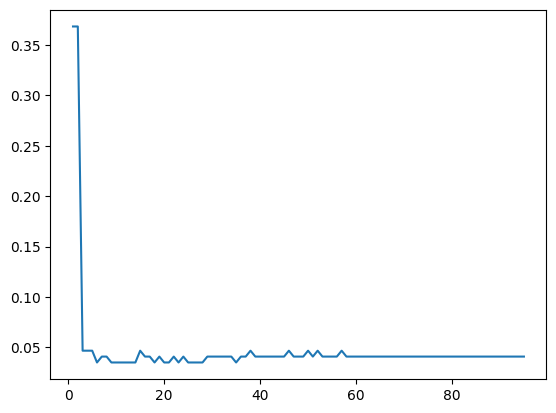

In [60]:
plt.plot(range(1,96),error_rates);

In [61]:
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
model_acc = accuracy_score(y_test,model_pred)
print('Classification Report: \n' + str(classification_report(y_test, model_pred)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

